# Ono path (順方向)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


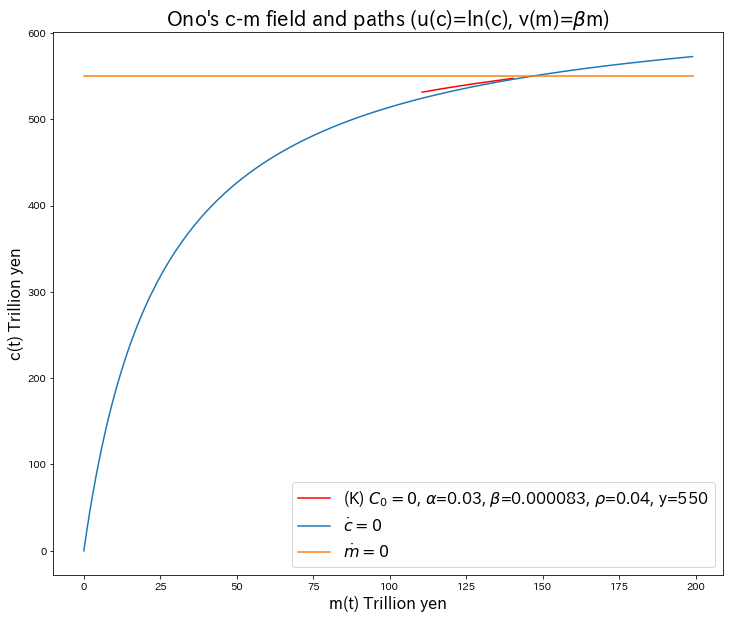

In [149]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from pylab import rcParams
rcParams['figure.figsize'] = 12,10

#dtと収束条件、0.001/mの値などでどこで止まるかは変わってしまう。この問題はどう対処すべきか。
#実際に
#eps0.07

tlist=[]
eps=0.0002
#収束条件を弱めると理論的な経路から外れてしまう。

alpha=0.03
beta=0.00007
rho=0.04
y=550

#c\dot=0の境界線
def cbound(m):
    return y*(rho-alpha)/((beta+0.0004/m)*y-alpha)

def func(alpha,beta,rho,y,c0,m0,mlist,clist,check): 
    #dm/dt=f
    #dc/dt=g
    def f(t,m,c):
        return -alpha*(c/y-1)*m

    def g(t,m,c):
        return (beta+0.0004/m-alpha/y)*c*c-(rho-alpha)*c

    #連立微分方程式　Runge-Kutta
    def RK(f,g,finaltime,tscale):
        dt = 0.01
        
        m_old=m0    
        c_old=c0    
        tt=0

        for time in range(int(finaltime/dt)+1):
            #trial/dt は時刻trialまでにdt刻みで何回計算させるかという意味
            if(tt%tscale==0):
                if (len(tlist)<=finaltime/tscale):
                    tlist.append(round(tt,3))
                    
                mlist.append(m_old)
                clist.append(c_old)

            k11=f(tt,m_old,c_old)*dt
            k12=g(tt,m_old,c_old)*dt

            k21=f(tt+dt/2,m_old+k11/2,c_old+k12/2)*dt
            k22=g(tt+dt/2,m_old+k11/2,c_old+k12/2)*dt

            k31=f(tt+dt/2,m_old+k21/2,c_old+k22/2)*dt
            k32=g(tt+dt/2,m_old+k21/2,c_old+k22/2)*dt

            k41=f(tt+dt,m_old+k31,c_old+k32)*dt
            k42=g(tt+dt,m_old+k31,c_old+k32)*dt

            km=(k11+2*k21+2*k31+k41)/6
            kc=(k12+2*k22+2*k32+k42)/6
                     
            #収束条件
            if((km < eps) and (kc <eps)):
                break
                
            else:
                m_new=m_old+(k11+2*k21+2*k31+k41)/6
                c_new=c_old+(k12+2*k22+2*k32+k42)/6

                m_old=m_new
                c_old=c_new

                tt=round(tt+dt,3)
                #少数第3桁までとする
    
    #RK(f,g,finaltime,tscale)
    RK(f,g,1000,1)

######FUNCTION########    
    
NUM=1
mlist = [[] for j in range(NUM)]
clist = [[] for j in range(NUM)]
#alpha,beta,rho,y,c0,m0,mlist,clist,check

func(0.03,0.00007,0.04,550,531.406,110.63,mlist[0],clist[0],1)


#均衡解に到達しうる初期値 m0,c0
#110.630448067561 531.4061789515233
#print("t={tl}".format(tl=tlist))
#print("m={tl}".format(tl=mlist))
#print("c={tl}".format(tl=clist))
#plt.xlim(0, 300)
#plt.plot(m(tlist),c(tlist),'r' ,label="c-m")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.ticklabel_format(useOffset=False)

ax.plot(mlist[0],clist[0],'r',label=r"(K) $C_{0}=0$, $\alpha$=0.03, $\beta$=0.000083, $\rho$=0.04, y=550")

x=np.arange(200)
ax.plot(x,list(map(cbound,x)), label=r"$\dot c=0$")
ax.plot(x,[y for j in range(len(x))],label=r"$\dot m=0$")

plt.title(r"Ono's c-m field and paths (u(c)=ln(c), v(m)=$\beta$m)",fontsize="20")
plt.xlabel("m(t) Trillion yen", fontsize="16")
plt.ylabel("c(t) Trillion yen",fontsize="16")

#plt.text(1100, 700, "t:year", fontsize="16")
#plt.text(1100,650,r"$\dotc= (v'(m)-\alpha/y)c^{2}-(\rho+\pi)c$ (=0 when $C_{0}=0$)",fontsize="16")
#plt.text(1100,600,r"$\dotm= -\pi m$",fontsize="16")
#plt.text(1100,550,r"$\pi= -\alpha(c/y-1)$",fontsize="16")


######グラフのラベル#####

tstamp=5
#tstamp*timescale=timescale
#for i,txt in enumerate(tlist[::tstamp]):
#    for t in range(NUM):
#        ax.annotate("t={tl}".format(tl=txt),(mlist[t][tstamp*i],clist[t][tstamp*i]))
        
plt.legend(prop={'size': 16})
plt.show()

fig.savefig('onos-cm-field.png')   # save the figure to file

# Numerical Analysis Examination

## 1. Runge-Kutta step size and Convergence criteria

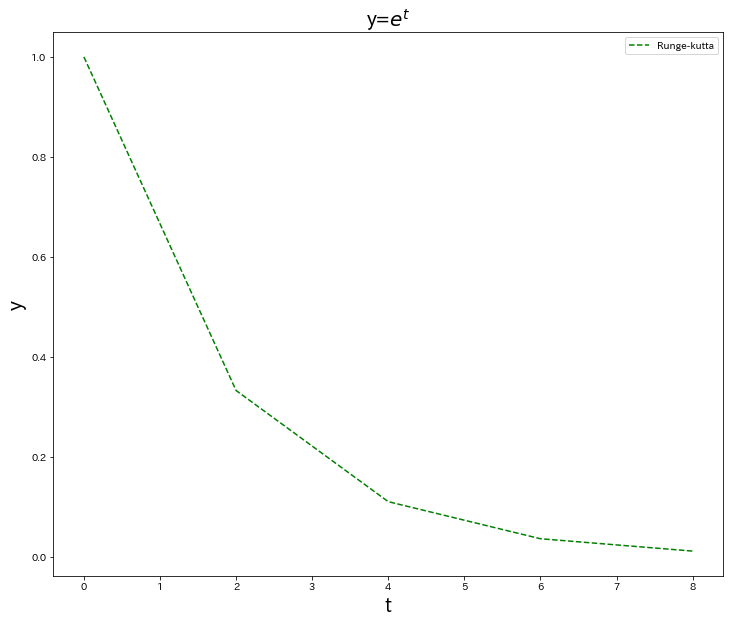

In [113]:
tlist=[]
ylist=[]
t=0

dt=2

#初期値
t=0
y_old=1
y_new=1

trial=10

#dy/dt=f(t,y)
def f(t,y):
    return -y

for time in range(int(trial/dt)):
    tlist.append(t)
    ylist.append(y_old)
    
    k1=f(t,y_old)*dt
    k2=f(t+dt/2,y_old+k1/2)*dt
    k3=f(t+dt/2,y_old+k2/2)*dt
    k4=f(t+dt,y_old+k3)*dt

    y_new=y_old+(k1+2*k2+2*k3+k4)/6
    y_old=y_new
    
    t+=dt
    

#plt.ylim(10, 100)
plt.plot(tlist,ylist,'g--' ,label="Runge-kutta")

#x=np.arange(trial+1)
#plt.plot(np.exp(x),'r^', label="$e^{x}$")

plt.title("y=$e^{t}$ ",fontsize=20)
plt.xlabel("t",fontsize=20)
plt.ylabel("y",fontsize=20)

plt.legend()
plt.show()

## 2. Backward Runge-Kutta

0.1000000000000188 0.05017513201684911


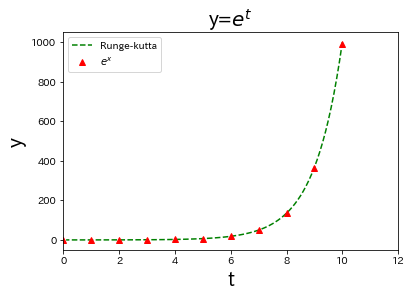

In [94]:
tlist=[]
ylist=[]


t=100
dt=0.1

#初期値は任意に設定してもよい。最終時刻での値を設定する。
#y=Cexp(-t)とし、最もはじめの時刻(配列の最後)でのy,tを代入してCを求める。
t=10
y_old=1000
#22026.4657948067

trial=10

#dy/dt=f(t,y)
def f(t,y):
    return y

for time in range(int(trial/dt)):
    tlist.append(t)
    ylist.append(y_old)
    
    k1=f(t,y_old)*dt
    k2=f(t-dt/2,y_old-k1/2)*dt
    k3=f(t-dt/2,y_old-k2/2)*dt
    k4=f(t-dt,y_old-k3)*dt

    y_new=y_old-(k1+2*k2+2*k3+k4)/6
    y_old=y_new
    
    t-=dt
    
#plt.ylim(10, 100)
plt.plot(tlist,ylist,'g--' ,label="Runge-kutta")

x=np.arange(trial+1)

plt.xlim(0,12)
print(tlist[99],ylist[99])
plt.plot(0.045*np.exp(x),'r^', label="$e^{x}$")

plt.title("y=$e^{t}$ ",fontsize=20)
plt.xlabel("t",fontsize=20)
plt.ylabel("y",fontsize=20)

plt.legend()
plt.show()


## 3. Backward Euler method

0.585053744059662
19823.81921532603


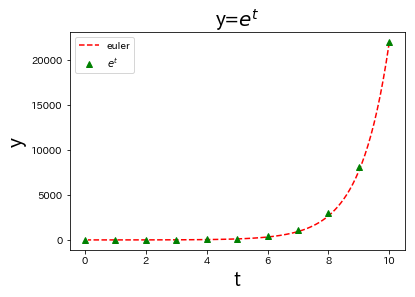

In [79]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

dy=0
tt=10

dt=0.1

y=22026.4657948067

trial=10

xlist=[]
ylist=[]
for time in range(int(trial/dt)):
    #np.append(xlist,tt)
    #np.append(ylist,y)
    xlist.append(tt)
    ylist.append(y)
    
    tt-=dt
    dy=-y*dt
    y+=dy

print(y)
print(ylist[1])

plt.figure()
plt.plot(xlist,ylist,'r--' ,label="euler")

x=np.arange(trial+1)
plt.plot(np.exp(x),'g^', label="$e^{t}$")

#plt.xlim(10, 20)

plt.title("y=$e^{t}$",fontsize=20)
plt.xlabel("t",fontsize=20)
plt.ylabel("y",fontsize=20)

plt.legend()
plt.show()



#for i in x:
#    print(i)

#x = np.arange(-3, 3, 0.1)
#y=np.sin(x)
##plt.plot(x,y)
#plt.show()

## Backward Ono's c-m path

- 均衡経路を均衡点から逆向きに辿った

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


110.630448067561 531.4061789515233


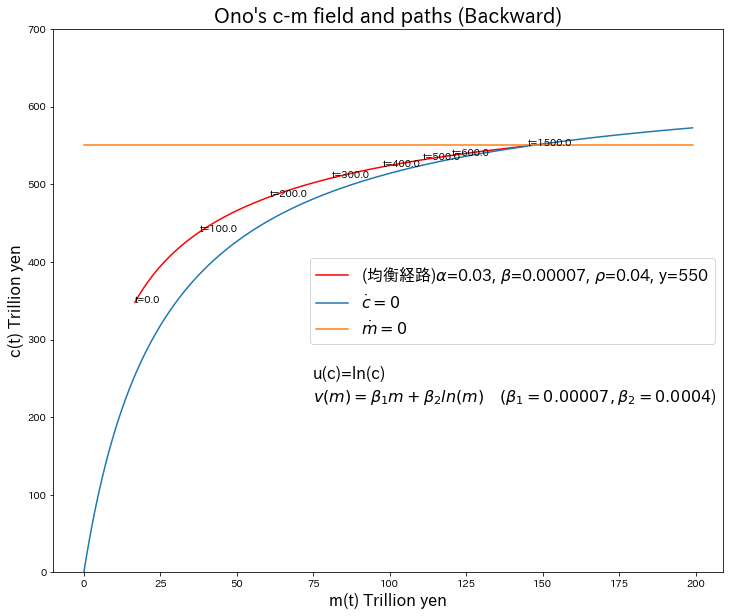

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from pylab import rcParams
rcParams['figure.figsize'] = 12,10

#dtと収束条件、0.001/mの値などでどこで止まるかは変わってしまう。この問題はどう対処すべきか。
#実際に
#eps0.07

tlist=[]
eps=0.00001

alpha=0.03
beta=0.00007
rho=0.04
y=550

def cbound(m):
    return y*(rho-alpha)/((beta+0.0004/m)*y-alpha)

def func(alpha,beta,rho,y,c0,m0,mlist,clist,check): 
    #dm/dt=f
    #dc/dt=g
    def f(t,m,c):
        return -alpha*(c/y-1)*m

    def g(t,m,c):
        return (beta+0.0004/m-alpha/y)*c*c-(rho-alpha)*c

    #連立微分方程式　Runge-Kutta
    def RK(f,g,finaltime,tscale):
        dt = 0.01
        
        m_old=m0    
        c_old=c0    
        
        
        tt=3000
        #tt=0

        for time in range(int(finaltime/dt)+1):
            #trial/dt は時刻trialまでにdt刻みで何回計算させるかという意味
            if(tt%tscale==0):
                if (len(tlist)<=finaltime/tscale):
                    tlist.append(round(tt,3))
                    #tlist.append(rount(tt,3))
                    
                mlist.append(m_old)
                clist.append(c_old)
                #clist.append(round(c(tt)/1,3))
            k11=f(tt,m_old,c_old)*dt
            k12=g(tt,m_old,c_old)*dt

            k21=f(tt-dt/2,m_old-k11/2,c_old-k12/2)*dt
            k22=g(tt-dt/2,m_old-k11/2,c_old-k12/2)*dt

            k31=f(tt-dt/2,m_old-k21/2,c_old-k22/2)*dt
            k32=g(tt-dt/2,m_old-k21/2,c_old-k22/2)*dt

            k41=f(tt-dt,m_old-k31,c_old-k32)*dt
            k42=g(tt-dt,m_old-k31,c_old-k32)*dt

            km=(k11+2*k21+2*k31+k41)/6
            kc=(k12+2*k22+2*k32+k42)/6
                     
            #収束条件
            if((km < eps) and (kc <eps)):
                break
                
            else:
                m_new=m_old-km
                c_new=c_old-kc

                m_old=m_new
                c_old=c_new

                tt=round(tt-dt,3)
                #少数第1桁までとする
    #RK(f,g,finaltime,tscale)
    RK(f,g,1500,1)

######FUNCTION########    
    
NUM=1
mlist = [[] for j in range(NUM)]
clist = [[] for j in range(NUM)]

#alpha,beta,rho,y,c0,m0,mlist,clist,check
func(0.03,0.00007,0.04,550,550,145,mlist[0],clist[0],1)

fig=plt.figure()
ax = fig.add_subplot(111)
ax.ticklabel_format(useOffset=False)

ax.plot(mlist[0],clist[0],'r',label=r"(均衡経路)$\alpha$=0.03, $\beta$=0.00007, $\rho$=0.04, y=550")

x=np.arange(200)
ax.plot(x,list(map(cbound,x)), label=r"$\dot c=0$")
ax.plot(x,[y for j in range(len(x))],label=r"$\dot m=0$")

plt.title(r"Ono's c-m field and paths (Backward)",fontsize="20")
plt.xlabel("m(t) Trillion yen", fontsize="16")
plt.ylabel("c(t) Trillion yen",fontsize="16")

tstamp=100
tlast=tlist[len(tlist)-1]

#tstamp*timescale=timescale
#tt=3000
#tlistedit=tlist[tstamp*10:-1]
#print( "abcdefghijklmn"[8:-1] )

for i,txt in enumerate(tlist[::tstamp]):
    #i=0は最後
    if (i>8 or i==0):
        for t in range(NUM):
            ax.annotate("t={tl}".format(tl=txt-tlast),(mlist[t][tstamp*i],clist[t][tstamp*i]))
print(mlist[0][1000],clist[0][1000])

#print(tlist[len(tlist)-1])
#print(tlist)
#print(tlistedit)
#print(tlist[::tstamp])
#plt.text(50,500,r"均衡経路",fontsize="16")

plt.text(75,250,r"u(c)=ln(c)",fontsize="16")
plt.text(75,220,r"$v(m)=\beta_{1} m+\beta_{2}ln(m) \quad (\beta_{1}=0.00007, \beta_{2}=0.0004$)",fontsize="16")

plt.legend(prop={'size': 16},loc='right')
plt.ylim(0,700)
plt.show()

fig.savefig('onos-cm-field(backward).png')   # save the figure to file

In [34]:
x=[1,2,3]
x[1:2]

[2]